Imports

In [1]:
import pandas as pd
from statsforecast import StatsForecast
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

c:\Users\jessi\OneDrive\Documents\Projetos\PetroleumPricePrediction\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

Data analysis

In [5]:
df = pd.read_csv("../data/processed/petroleum_price.csv",
                                    sep=',',
                                    parse_dates=['date']
                                    )

In [6]:
df.head()

,id,date,price
0,Europe Brent Spot Price FOB (Dollars per Barrel),2023-12-29,77.69
1,Europe Brent Spot Price FOB (Dollars per Barrel),2023-12-28,79.04
2,Europe Brent Spot Price FOB (Dollars per Barrel),2023-12-27,80.97
3,Europe Brent Spot Price FOB (Dollars per Barrel),2023-12-22,80.23
4,Europe Brent Spot Price FOB (Dollars per Barrel),2023-12-21,80.73


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   id      753 non-null    object        
 1   date    753 non-null    datetime64[ns]
 2   price   753 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 17.8+ KB


count    753.000000
mean      84.743851
std       15.770642
min       50.370000
25%       74.300000
50%       82.550000
75%       92.930000
max      133.180000
Name: price, dtype: float64

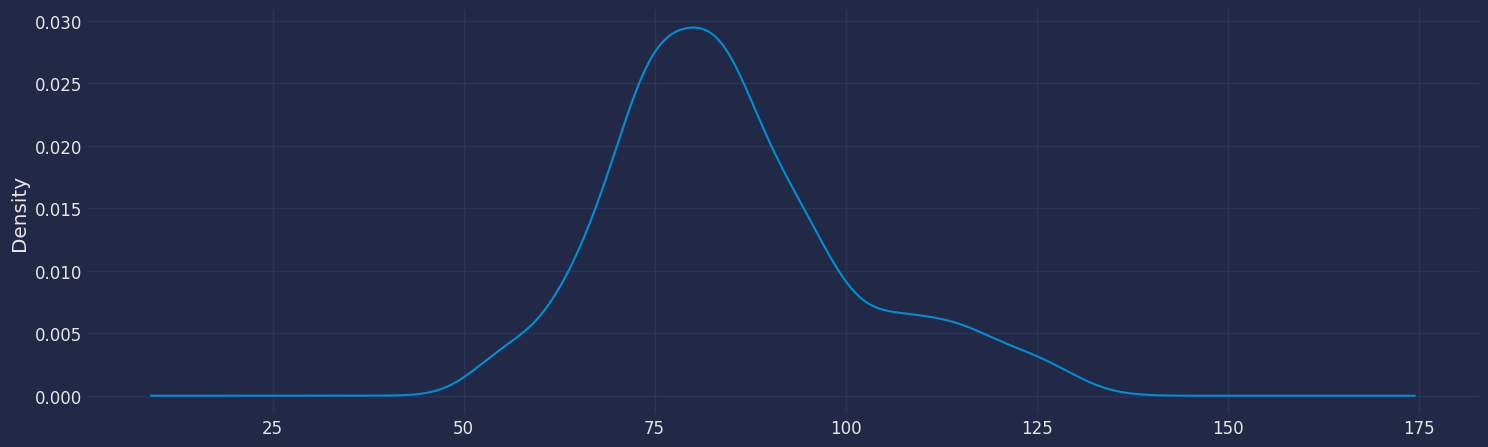

In [8]:
df["price"].plot(kind='kde',figsize = (16,5))
df["price"].describe()

Plot time series

In [10]:
df.rename(columns={"id": "unique_id",
                   "date":"ds",
                   "price":"y"}, inplace=True)
df.head()

,unique_id,ds,y
0,Europe Brent Spot Price FOB (Dollars per Barrel),2023-12-29,77.69
1,Europe Brent Spot Price FOB (Dollars per Barrel),2023-12-28,79.04
2,Europe Brent Spot Price FOB (Dollars per Barrel),2023-12-27,80.97
3,Europe Brent Spot Price FOB (Dollars per Barrel),2023-12-22,80.23
4,Europe Brent Spot Price FOB (Dollars per Barrel),2023-12-21,80.73


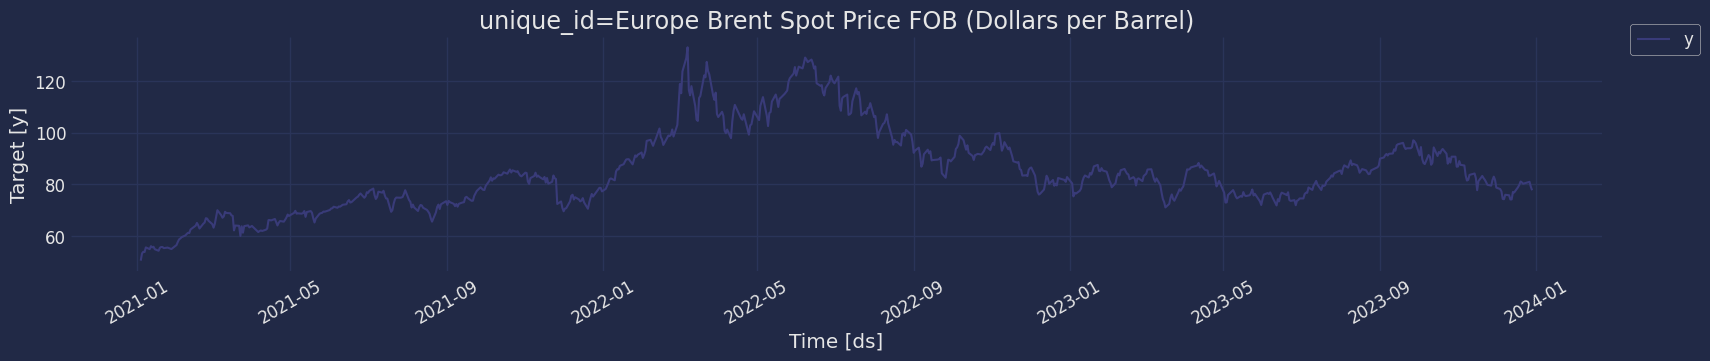

In [11]:
StatsForecast.plot(df)

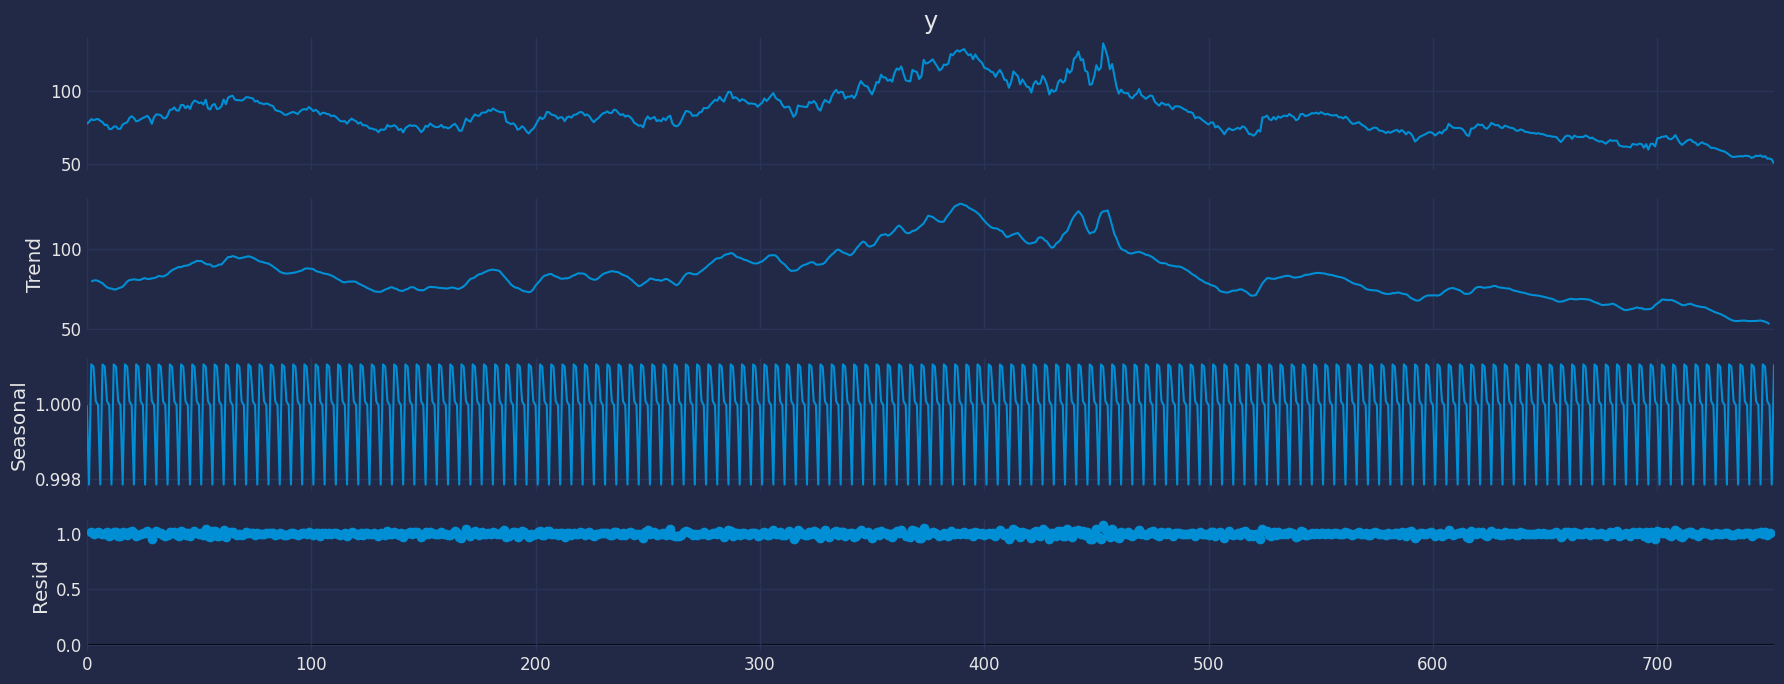

In [17]:
results = seasonal_decompose(df["y"], model='multiplicative',period=5)
fig = results.plot()

Testing for stationarity

In [18]:
def adf_test(timeseries, valor_critico):
    print ('------- Resultados do Teste ADF: -------')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Teste Estatístico','P-Value','#Lags Usados','Número de observações usadas'])
    
    for key,value in dftest[4].items():
        dfoutput['Valor Crítico (%s)'%key] = value
        
    if dftest[1] < valor_critico: # Hipótese Nula
        dfoutput['-> Estacionária'] = True
    else: # Hipótese Alternativa
        dfoutput['-> Estacionária'] = False
        
    print (dfoutput)

In [19]:
adf_test(df['y'], 0.05)

------- Resultados do Teste ADF: -------
Teste Estatístico              -0.828526
P-Value                         0.810599
#Lags Usados                         6.0
Número de observações usadas       746.0
Valor Crítico (1%)             -3.439146
Valor Crítico (5%)             -2.865422
Valor Crítico (10%)            -2.568837
-> Estacionária                    False
dtype: object
